<a href="https://colab.research.google.com/github/Omar-Rashdan20/datascience/blob/main/ML_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, multilabel_confusion_matrix,precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

In [ ]:
# @title Load Data

data=pd.read_excel("/content/customer_dataset.xlsx")



In [ ]:
# @title Get Data Summary
#Summary statistics Dataframe
data.describe()

,Cust iD,Amount_in_usd
count,510.000000,510.000000
mean,10255.500000,38.826686
std,147.368586,56.034412
min,10001.000000,15.060000
25%,10128.250000,17.732500
50%,10255.500000,20.465000
75%,10382.750000,23.370000
max,10510.000000,247.140000


In [ ]:
# @title information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cust iD        510 non-null    int64  
 1   Region         510 non-null    object 
 2   Payment_mode   510 non-null    object 
 3   how_they_buy   510 non-null    object 
 4   Amount_in_usd  510 non-null    float64
 5   Product_type   510 non-null    object 
 6   Time Of Day    510 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.0+ KB


In [ ]:
#unique() method is used to know all type of unique values in Class column.
data["Cust iD"].unique()

array([10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009,
       10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018,
       10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027,
       10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036,
       10037, 10038, 10039, 10040, 10041, 10042, 10043, 10044, 10045,
       10046, 10047, 10048, 10049, 10050, 10051, 10052, 10053, 10054,
       10055, 10056, 10057, 10058, 10059, 10060, 10061, 10062, 10063,
       10064, 10065, 10066, 10067, 10068, 10069, 10070, 10071, 10072,
       10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080, 10081,
       10082, 10083, 10084, 10085, 10086, 10087, 10088, 10089, 10090,
       10091, 10092, 10093, 10094, 10095, 10096, 10097, 10098, 10099,
       10100, 10101, 10102, 10103, 10104, 10105, 10106, 10107, 10108,
       10109, 10110, 10111, 10112, 10113, 10114, 10115, 10116, 10117,
       10118, 10119, 10120, 10121, 10122, 10123, 10124, 10125, 10126,
       10127, 10128,

In [ ]:
# @title Exploratory data analysis (EDA)
data


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


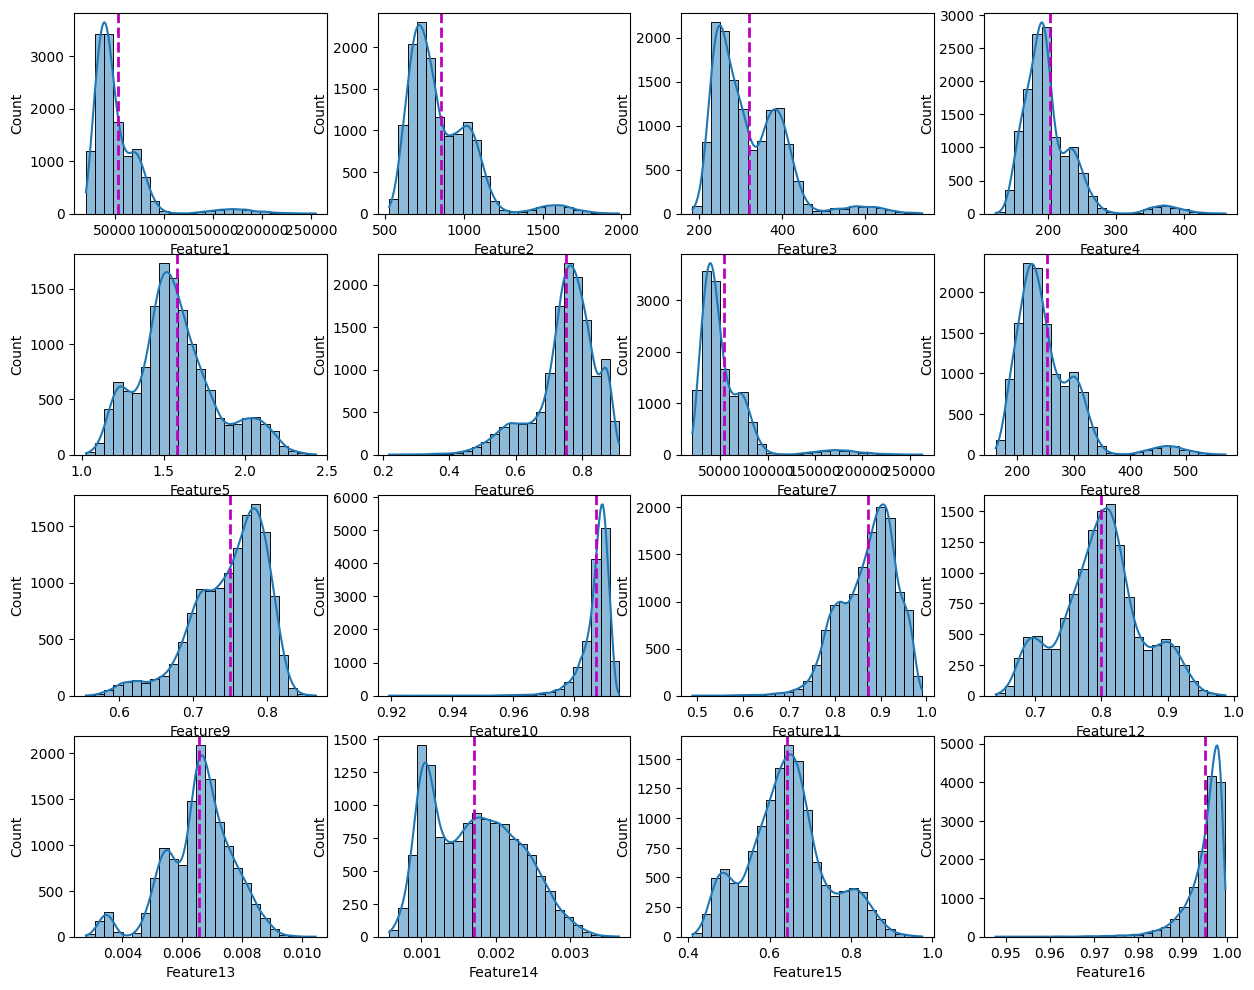

In [ ]:
cols = data.drop(columns=['Class']).columns
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(cols, ax.flatten()):#flatten:the resulting array is a one-dimensional representation of the original
    g=sns.histplot(data[variable],bins=25, kde=True, ax=subplot)
    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.show()

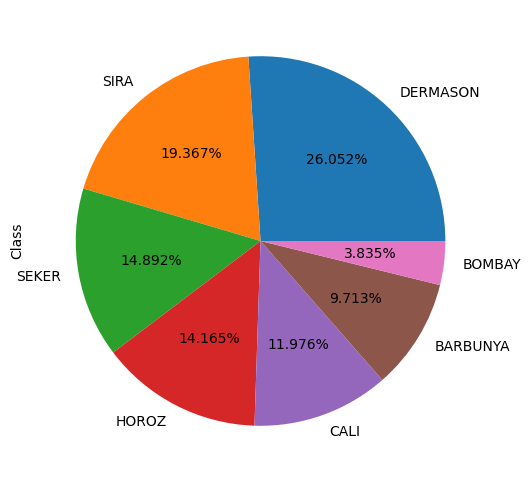

In [ ]:
#A pie chart is a circular statistical graphic which is divided into slices to illustrate numerical proportion
data.Class.value_counts().plot(kind='pie', autopct='%1.3f%%', figsize=(6,6))
plt.show()


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

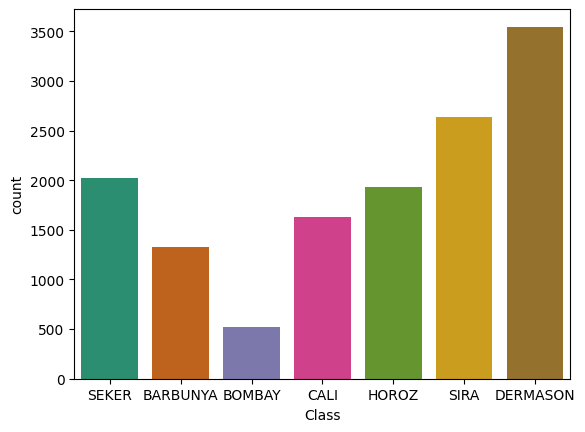

In [ ]:
sns.countplot(x=data['Class'], data=data, palette='Dark2')
data["Class"].value_counts()
#It can be seen that from the data, the largest class is DERMASON with a number of around 3500 (26.052%)
#the lowest is BOMBAY with a number of around 500 (3.835%)

The target suffuers from data imbalance.

To address the issue of data imbalance,i am used the SMOTE (Synthetic Minority Over-sampling Technique), which is a commonly used oversampling method to solve the imbalance problem  SMOTE aims to balance class distribution by randomly increasing minority class examples by replicating them

In [ ]:
# @title Balancing Data (SMOTE)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [ ]:
X = data.drop('Class', axis=1)
y = data.Class

In [ ]:
X_smote, y_smote = smote.fit_resample(X, y)#balance

In [ ]:
X_smote

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16
0,28395,610.291000,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018000,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110000,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884000,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134000,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24817,43169,780.614181,290.000273,190.489454,1.522451,0.753955,43855,234.446859,0.747149,0.984367,0.890258,0.808451,0.006718,0.001770,0.653604,0.995010
24818,53592,882.208452,341.523450,201.345268,1.696359,0.807658,54108,261.220563,0.759305,0.990457,0.865313,0.764888,0.006373,0.001346,0.585068,0.992363
24819,47980,830.677616,323.836822,189.140484,1.712477,0.811491,48475,247.164598,0.797030,0.989792,0.873792,0.763315,0.006749,0.001414,0.582709,0.997481
24820,48222,826.538366,309.497879,199.175171,1.554259,0.765076,48789,247.786752,0.724073,0.988380,0.887028,0.800705,0.006418,0.001628,0.641203,0.996126


In [ ]:
y_smote

0        SEKER
1        SEKER
2        SEKER
3        SEKER
4        SEKER
         ...  
24817     SIRA
24818     SIRA
24819     SIRA
24820     SIRA
24821     SIRA
Name: Class, Length: 24822, dtype: object

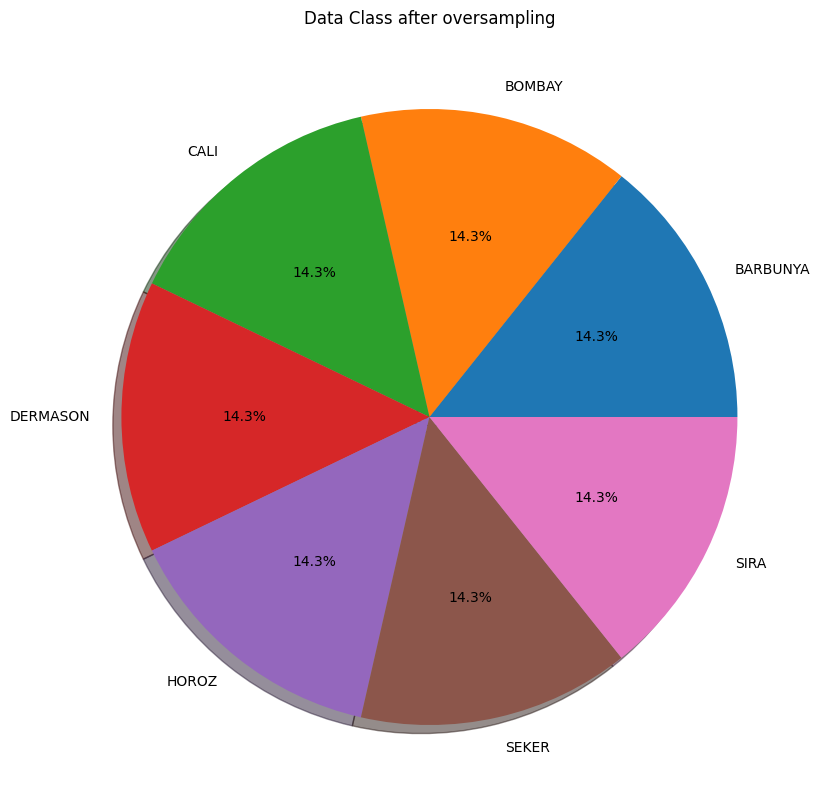

In [ ]:
# @title Check New Data
labels, counts = np.unique(y_smote, return_counts=True)
plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels,shadow=True)
plt.title('Data Class after oversampling')
plt.show()

In [ ]:
y_smote.value_counts()

SEKER       3546
BARBUNYA    3546
BOMBAY      3546
CALI        3546
HOROZ       3546
SIRA        3546
DERMASON    3546
Name: Class, dtype: int64

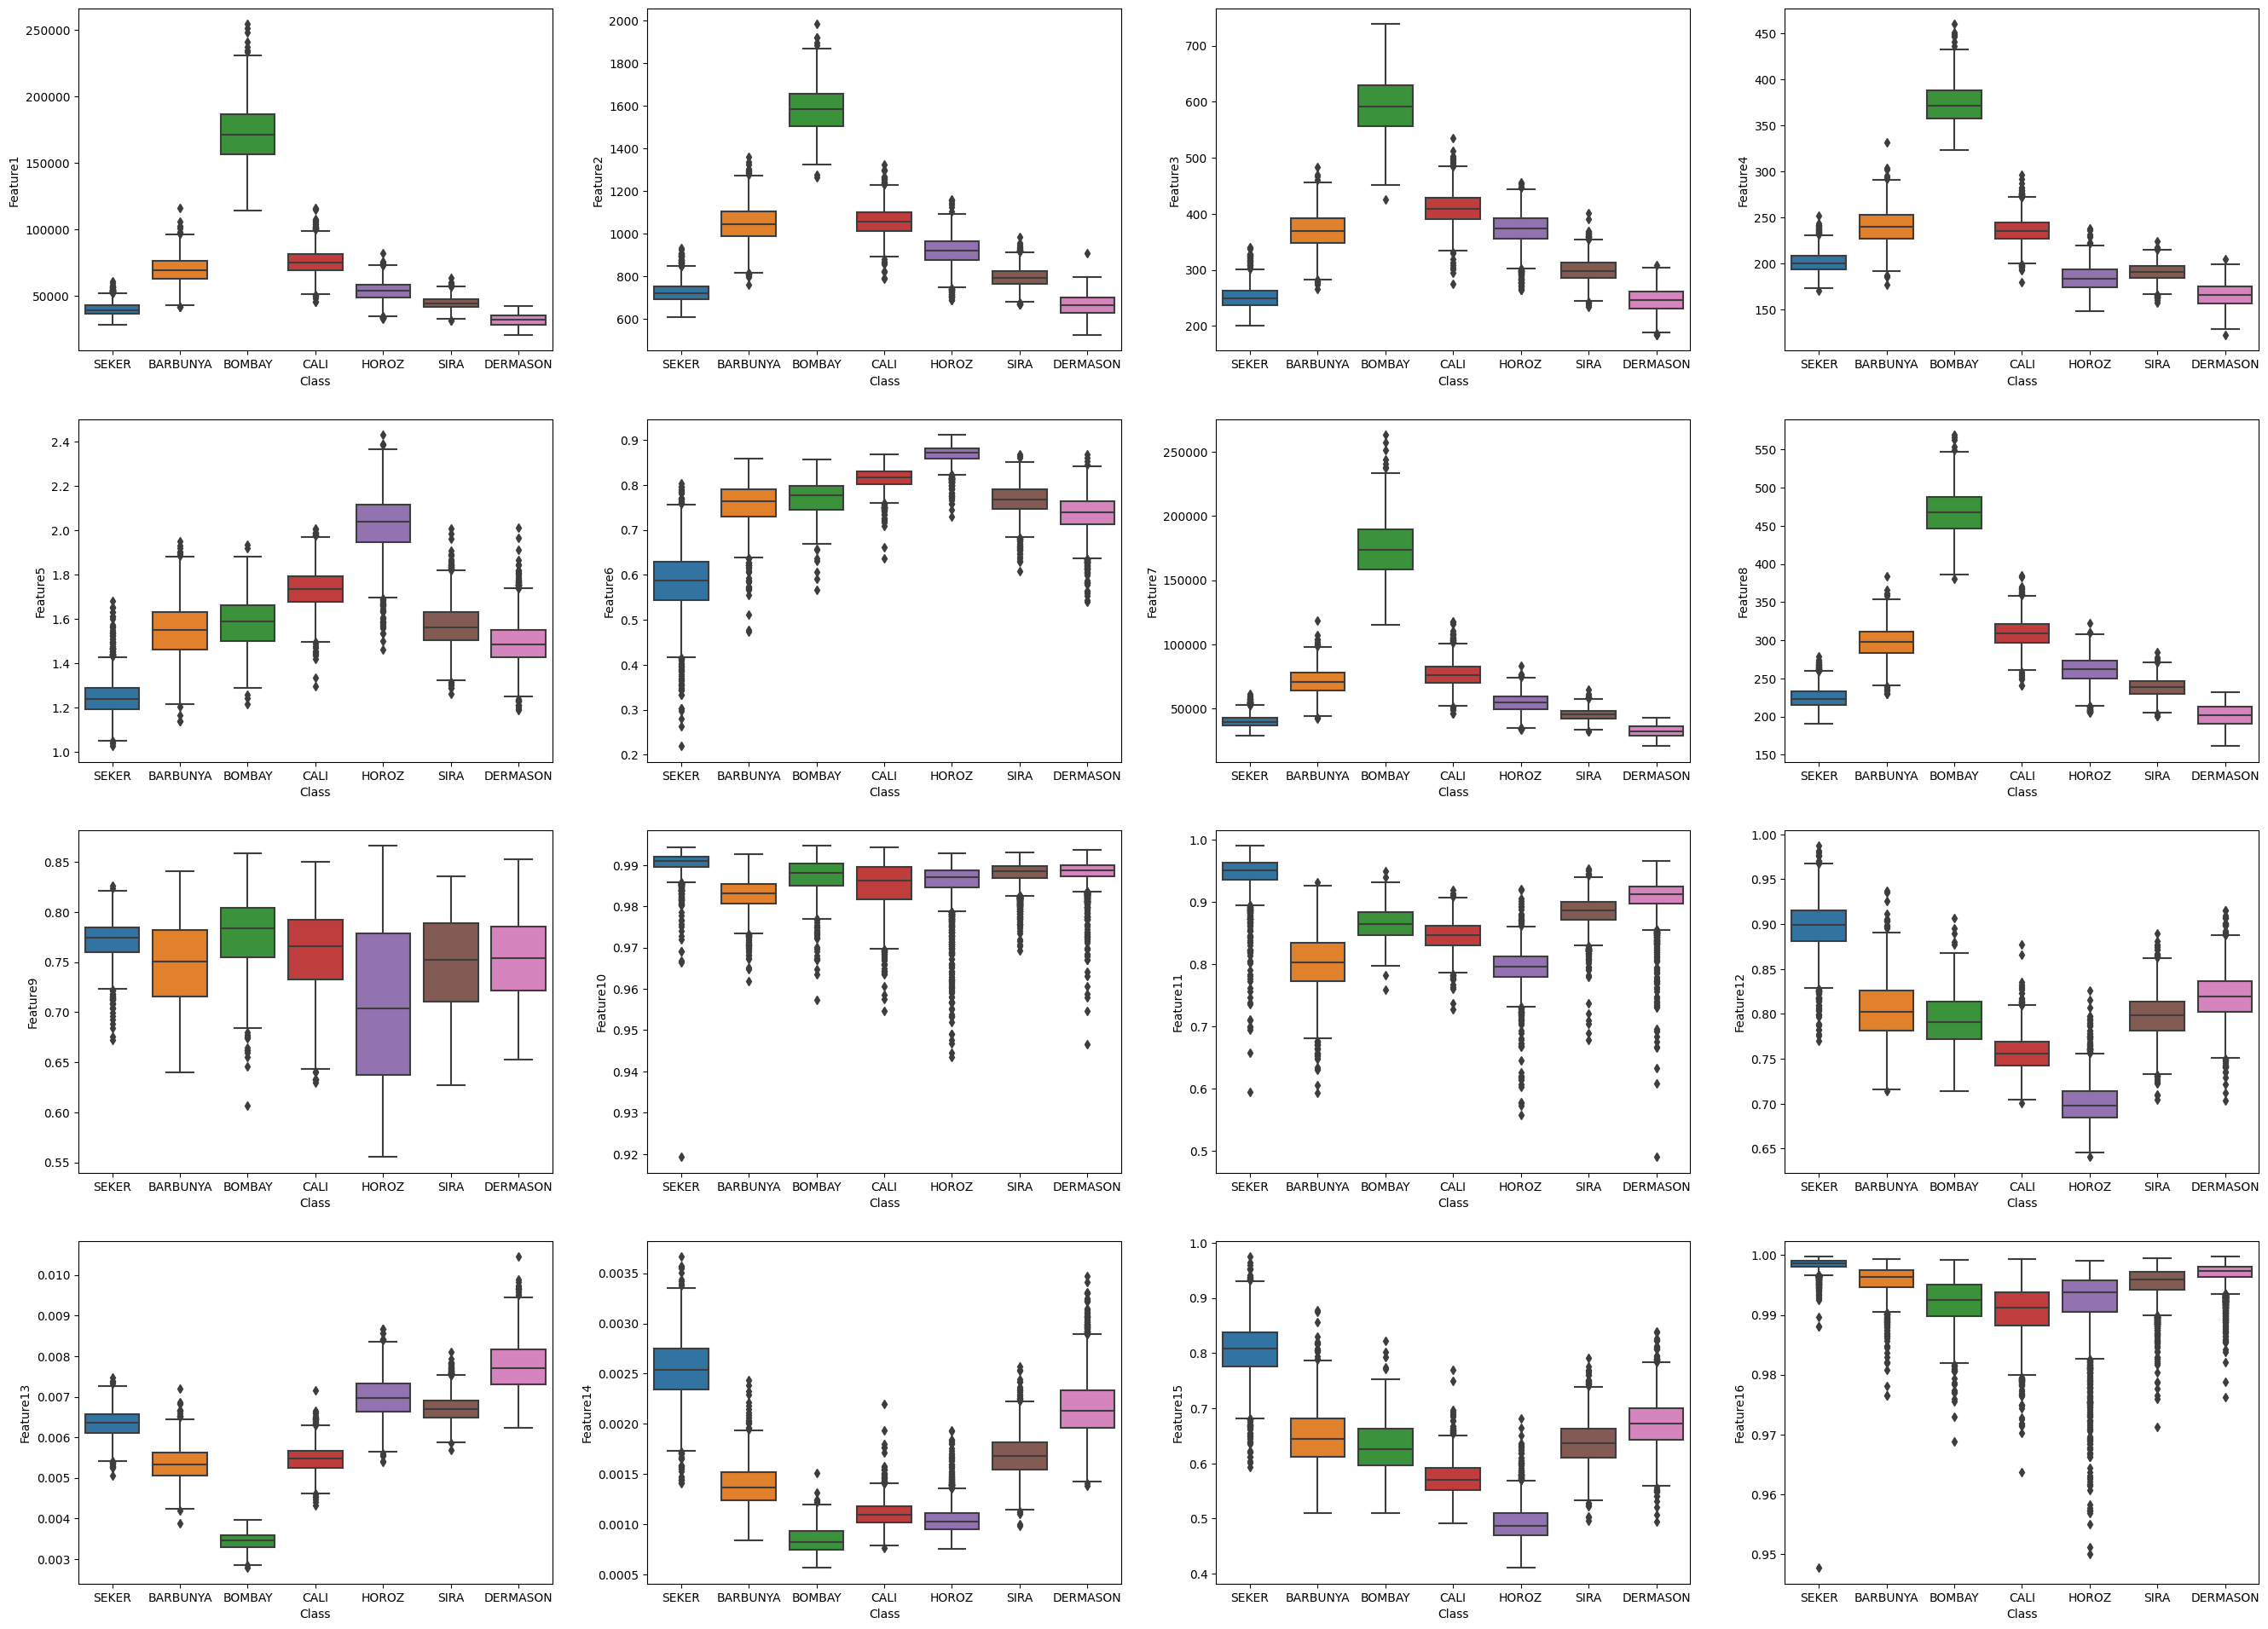

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(33,24))
sns.boxplot(x='Class', y='Feature1', data=data, ax=ax[0][0])
sns.boxplot(x='Class', y='Feature2', data=data, ax=ax[0][1])
sns.boxplot(x='Class', y='Feature3', data=data, ax=ax[0][2])
sns.boxplot(x='Class', y='Feature4', data=data, ax=ax[0][3])

sns.boxplot(x='Class', y='Feature5', data=data, ax=ax[1][0])
sns.boxplot(x='Class', y='Feature6', data=data, ax=ax[1][1])
sns.boxplot(x='Class', y='Feature7', data=data, ax=ax[1][2])
sns.boxplot(x='Class', y='Feature8', data=data, ax=ax[1][3])

sns.boxplot(x='Class', y='Feature9', data=data, ax=ax[2][0])
sns.boxplot(x='Class', y='Feature10', data=data, ax=ax[2][1])
sns.boxplot(x='Class', y='Feature11', data=data, ax=ax[2][2])
sns.boxplot(x='Class', y='Feature12', data=data, ax=ax[2][3])

sns.boxplot(x='Class', y='Feature13', data=data, ax=ax[3][0])
sns.boxplot(x='Class', y='Feature14', data=data, ax=ax[3][1])
sns.boxplot(x='Class', y='Feature15', data=data, ax=ax[3][2])
sns.boxplot(x='Class', y='Feature16', data=data, ax=ax[3][3])
plt.show()

We can notice that the "Bombay" & "Horoz" classes are distinct from other classes.

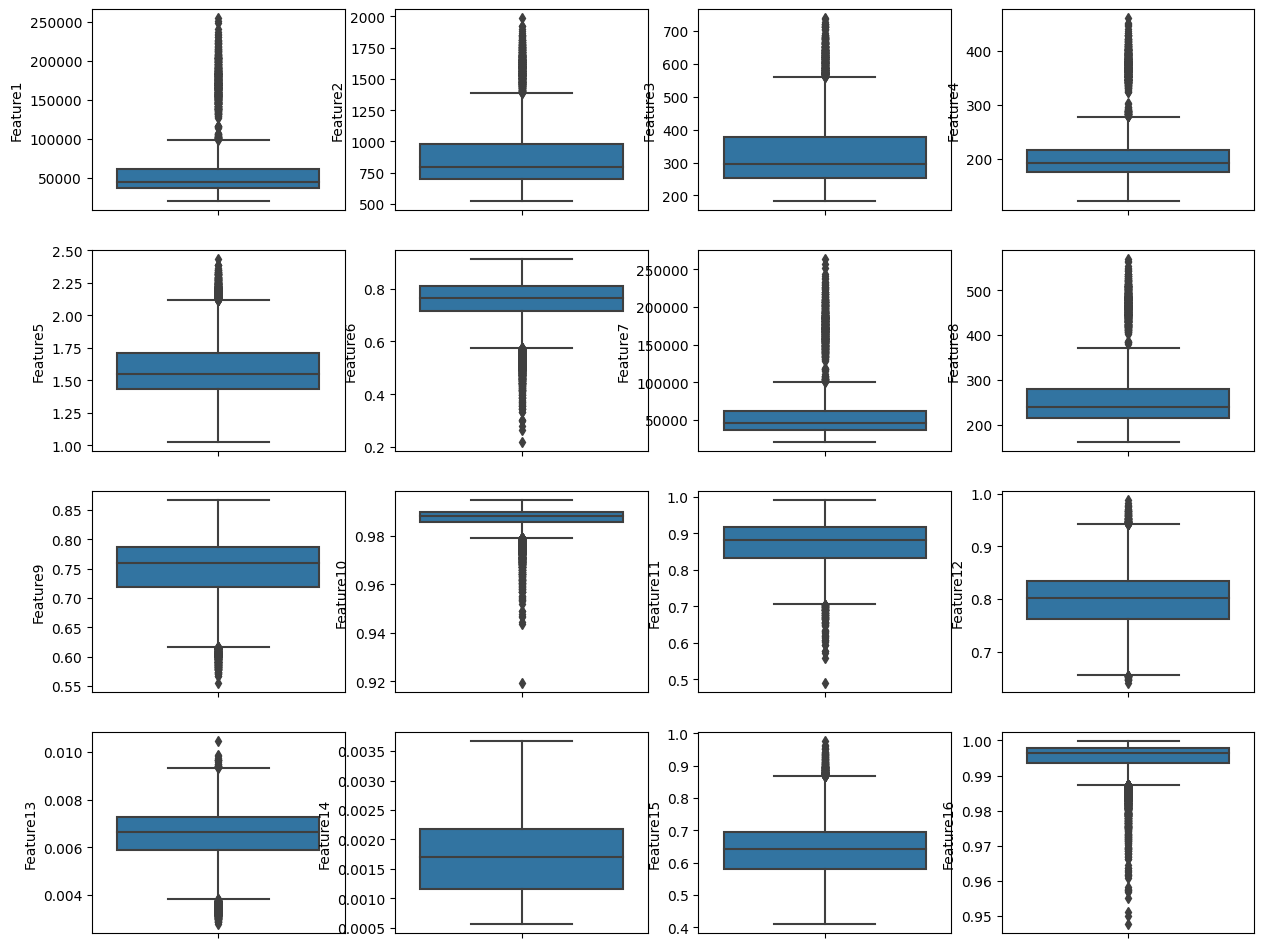

In [ ]:
cols = data.drop(columns=['Class']).columns
fig, ax = plt.subplots(4, 4, figsize=(15,12))
for variable, subplot in zip(cols, ax.flatten()):
    sns.boxplot(y= data[variable], ax=subplot)
plt.show()

In [ ]:
# @title Data Preprocessing
# Finding Null Values
data.isnull().sum()


Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6     0
Feature7     0
Feature8     0
Feature9     0
Feature10    0
Feature11    0
Feature12    0
Feature13    0
Feature14    0
Feature15    0
Feature16    0
Class        0
dtype: int64

In [ ]:
# @title Checking for duplicates
data.duplicated().sum()

68

In [ ]:
list(np.unique(y_smote))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

<ipython-input-166-c5b7e01c3226>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

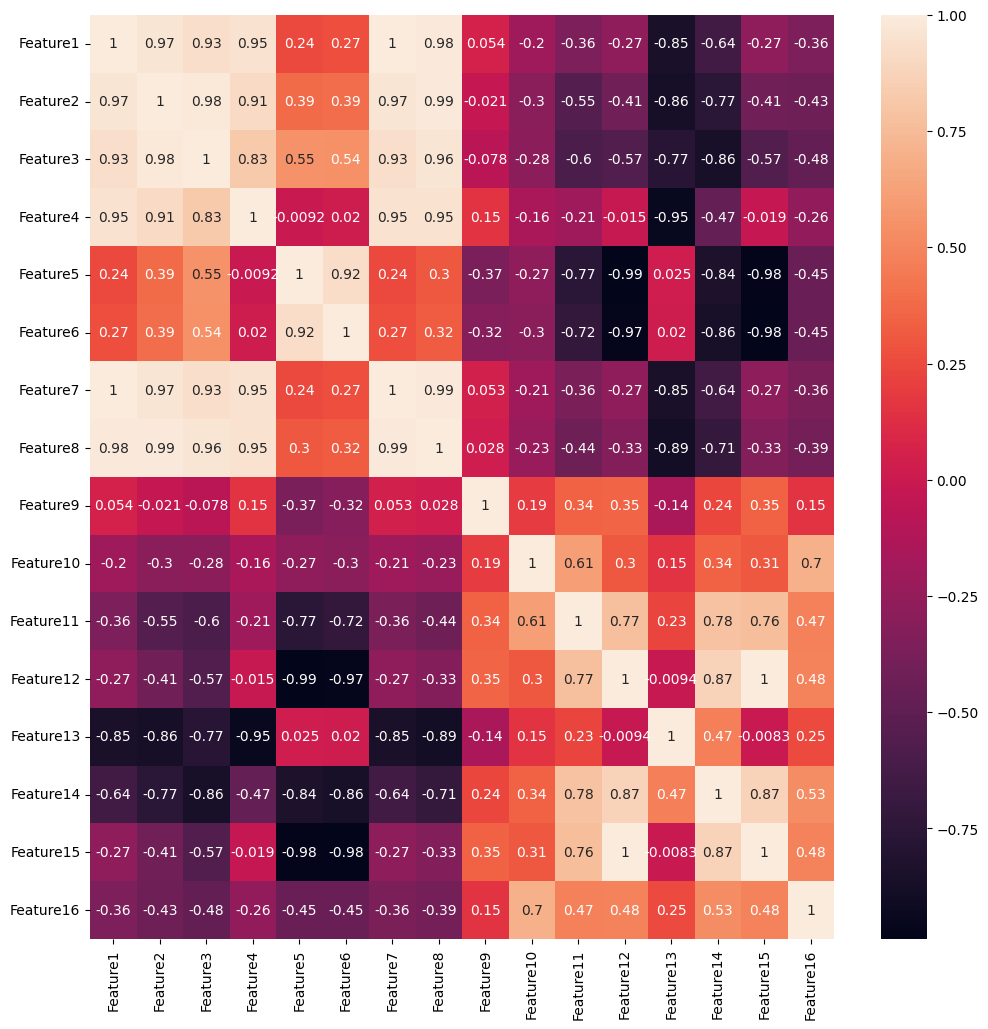

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
#Heatmap is defined as a graphical representation of data
#using colors to visualize the value of the matrix.
#In this, The output of the code will be a heatmap that shows the correlation between the features in the data DataFrame.

In [ ]:
# @title Feature Selection
X_smote.drop((["Feature3","Feature4",'Feature6','Feature7','Feature8','Feature12']),axis=1,inplace=True)


In [ ]:
X_smote.head()

,Feature1,Feature2,Feature5,Feature9,Feature10,Feature11,Feature13,Feature14,Feature15,Feature16
0,28395,610.291,1.197191,0.763923,0.988856,0.958027,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,1.097356,0.783968,0.984986,0.887034,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,1.209713,0.778113,0.989559,0.947849,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,1.153638,0.782681,0.976696,0.903936,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,1.060798,0.773098,0.990893,0.984877,0.006697,0.003665,0.941900,0.999166


In [ ]:
y_smote.info()
X_smote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 24822 entries, 0 to 24821
Series name: Class
Non-Null Count  Dtype 
--------------  ----- 
24822 non-null  object
dtypes: object(1)
memory usage: 194.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24822 entries, 0 to 24821
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature1   24822 non-null  int64  
 1   Feature2   24822 non-null  float64
 2   Feature5   24822 non-null  float64
 3   Feature9   24822 non-null  float64
 4   Feature10  24822 non-null  float64
 5   Feature11  24822 non-null  float64
 6   Feature13  24822 non-null  float64
 7   Feature14  24822 non-null  float64
 8   Feature15  24822 non-null  float64
 9   Feature16  24822 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.9 MB


In [ ]:
# @title Model Training


In [ ]:
f_train, f_test, l_train, l_test = train_test_split(X_smote, y_smote, shuffle=True, test_size=0.20)

In [ ]:
#scaling using standard scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(f_train)
ss.transform(f_test)

array([[ 1.99763284,  1.97705757,  0.11234949, ..., -1.1585866 ,
        -0.25284023,  0.21956476],
       [ 1.91251203,  1.87479983, -0.02055801, ..., -1.1076138 ,
        -0.14737472, -0.54905465],
       [-0.22911108,  0.0027749 ,  1.47891378, ..., -0.82316005,
        -1.32788382, -0.21829954],
       ...,
       [-0.26163692, -0.08634202,  1.93640984, ..., -0.93319617,
        -1.60112175,  0.08949153],
       [-0.66773411, -0.683127  , -0.65364194, ...,  0.76794595,
         0.53470428, -0.51845808],
       [-0.77359447, -0.7654038 ,  1.6811503 , ..., -0.37945922,
        -1.47082409, -0.90503914]])

In [ ]:
# @title Decision Tree

In [ ]:
dec = DecisionTreeClassifier()
dec.fit(f_train, l_train)

DecisionTreeClassifier()

In [ ]:
l_pred=dec.predict(f_test)

In [ ]:
print(classification_report(l_pred,l_test))
print("accuracy for model : ",accuracy_score(l_pred, l_test))

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.96      0.95       701
      BOMBAY       1.00      1.00      1.00       701
        CALI       0.97      0.95      0.96       731
    DERMASON       0.90      0.88      0.89       706
       HOROZ       0.96      0.96      0.96       750
       SEKER       0.95      0.97      0.96       700
        SIRA       0.86      0.86      0.86       676

    accuracy                           0.94      4965
   macro avg       0.94      0.94      0.94      4965
weighted avg       0.94      0.94      0.94      4965

accuracy for model :  0.9397784491440081


In [ ]:
print(multilabel_confusion_matrix(l_pred, l_test))


[[[4224   40]
  [  31  670]]

 [[4264    0]
  [   0  701]]

 [[4209   25]
  [  40  691]]

 [[4192   67]
  [  83  623]]

 [[4181   34]
  [  28  722]]

 [[4227   38]
  [  23  677]]

 [[4194   95]
  [  94  582]]]


From the Confusion matrix above, this model is more able to predict the BOMBAY type than other types by looking at the number of False Positives and False Negatives which is 0. This model is more able to predict the type that appears the least in the dataset. However, this does not mean that this model is more difficult to predict the types that are most abundant in the dataset because from the results above this model is more difficult to predict the SIRA type.

If we look back at the EDA section, we know that BOMBAY has different characteristics from the others, namely that it is bigger than the others. In the boxplot section, it can be seen that the minimum values ​​(feature1 and feature2) for BOMBAY are above the maximum values ​​of the other types of Class. It is because of these different characters that BOMBAY is very easy to classify. Even if you look at the precision, recall and f1-score, the value is 1.00

In [ ]:
# @title Random Forest
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.2,shuffle=True, random_state=42)

RFC= RandomForestClassifier()

RFC.fit(X_train, y_train)

#cross = cross_val_score(RFC, X_train, y_train, cv=7)
#accuracy = RFC.score(X_test, y_test)
ypred=RFC.predict(X_test)
accuracy = accuracy_score(y_test, ypred)
print("Accuracy :",accuracy )
#X_ = X_train.append(X_test)
#y_ = y_train.append(y_test)
# Perform cross-validation
#cv_scores = cross_val_score(RFC, X_, y_, cv=5)  # Use 5-fold cross-validation
#average_accuracy = cv_scores.mean()
#formatted_cv_accuracy = format(average_accuracy, '.0%')
#print("Cross-validated Accuracy:", formatted_cv_accuracy)

Accuracy : 0.954884189325277


As you can see, using the “RandomForestClassifier” will output an accuracy of 96% without cross-validation which shows a good score. Then, an accuracy of 95% after cross validation has been done. This means that the model as applied to the dataset, can do a pretty good job even on unseen data. Basically, the performance of the model is good in general.

In [ ]:
f1= f1_score(y_test, ypred,average="weighted")
print("F1-score=",f1)


F1-score= 0.9548534815399938


In [ ]:
precision = precision_score(y_test, ypred,average="weighted")
print("precision=",precision)

precision= 0.9548787725562042


In [ ]:
recall  = recall_score(y_test, ypred,average="weighted")
print("recall=",recall)

recall= 0.954884189325277


In [ ]:
# @title logistic regression

feature_train,feature_test,label_train,label_test=train_test_split(X_smote,y_smote,shuffle=True,random_state=42,test_size=0.2)


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [ ]:
from sklearn.preprocessing import StandardScaler
stdscalar=StandardScaler()
feature_train=stdscalar.fit_transform(feature_train)
feature_test=stdscalar.transform(feature_test)

In [ ]:
model.fit(feature_train,label_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions=model.predict(feature_test)
accuracy_score(label_test,predictions)

0.9440080563947634

In [ ]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.96      0.94      0.95       717
      BOMBAY       1.00      1.00      1.00       714
        CALI       0.95      0.96      0.95       719
    DERMASON       0.92      0.89      0.90       721
       HOROZ       0.97      0.96      0.96       701
       SEKER       0.96      0.96      0.96       691
        SIRA       0.86      0.89      0.87       702

    accuracy                           0.94      4965
   macro avg       0.94      0.94      0.94      4965
weighted avg       0.94      0.94      0.94      4965



In [ ]:
# @title Optimization ( " Random Forest " )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,shuffle=True,test_size=0.2,random_state=42)
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
# Try optimizing number of trees
n_estimators = [100, 200, 300, 500, 1000]
for n in n_estimators:
  rf = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  print('Accuracy with {} trees: {}'.format(n, accuracy_score(y_test, y_pred)))
print("************max_depth**********")
max_depth = [5, 8, 15, None]
for depth in max_depth:
  rf = RandomForestClassifier(max_depth=depth).fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  print('Accuracy with max_depth {}: {}'.format(depth, accuracy_score(y_test, y_pred)))
print("That is ALL 😊 ,'Thank You'")


Accuracy with 100 trees: 0.953877139979859
Accuracy with 200 trees: 0.9552870090634441
Accuracy with 300 trees: 0.9564954682779456
Accuracy with 500 trees: 0.9562940584088621
Accuracy with 1000 trees: 0.9558912386706948
************max_depth**********
Accuracy with max_depth 5: 0.9174219536757301
Accuracy with max_depth 8: 0.9438066465256798
Accuracy with max_depth 15: 0.9544813695871097
Accuracy with max_depth None: 0.9564954682779456
That is ALL 😊
